# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [44]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import time

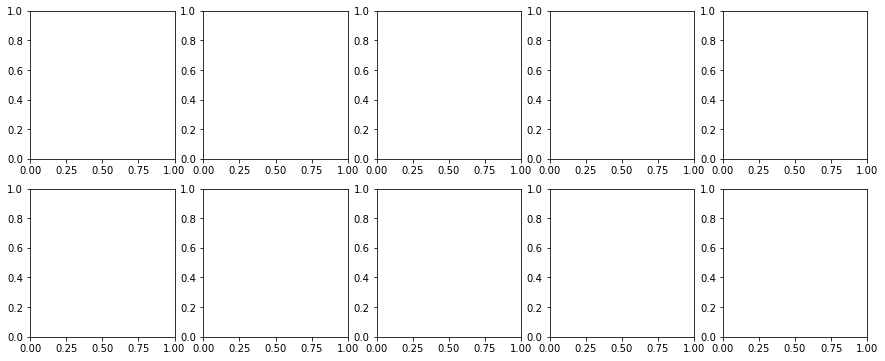

In [49]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 50, 100, 200, 1000, 3000, 5000, 10000]

# 設定S曲線資料點
X, color = datasets.make_s_curve(n_samples, random_state=0)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

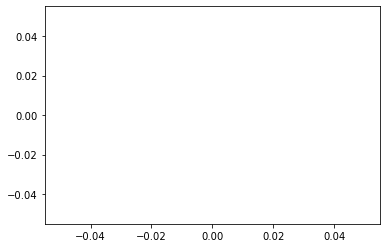

In [50]:
# 繪製資料原圖
ax = subplots[0, 0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [51]:
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)

for i, perplexity in enumerate(perplexities):

    if i < 4:
        ax = subplots[0, i+1]
    else:
        ax = subplots[1, i-4]

    t0 = time.time()
    tsne = manifold.TSNE(n_components=n_components,
                        init="random",
                        random_state=1,
                        perplexity=perplexity)
    result = tsne.fit_transform(X)
    t1 = time.time()
    print(f"s curve, perlexity={perplexity} in {t1-t0:.2g}")
    ax.set_title(f"Perplexity={perplexity}")
    ax.scatter(result[:, 0], result[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


s curve, perlexity=4 in 0.45
s curve, perlexity=6 in 0.43
s curve, perlexity=50 in 0.49
s curve, perlexity=100 in 0.57
s curve, perlexity=200 in 0.72
s curve, perlexity=1000 in 0.4
s curve, perlexity=3000 in 0.4
s curve, perlexity=5000 in 0.4
s curve, perlexity=10000 in 0.4


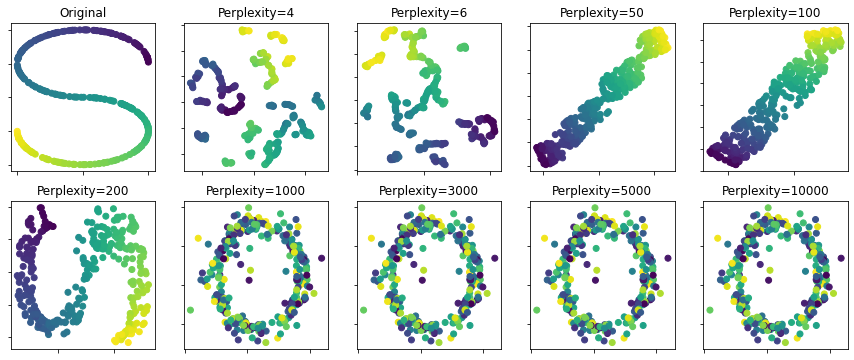

In [52]:
fig